In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Shailendra29\PycharmProjects\Analytics Vidhya\Building_First_ML_Model\Healthcare_data.csv")

In [3]:
df.shape

(10000, 23)

In [4]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.0,198.0,99.0,72.0,37.0,37.0,37.0,37.0,...,1,2,1,0,1,False,True,True,False,False
1,37.0,24.0,121.0,199.0,103.0,75.0,37.0,37.0,37.0,37.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,81.0,81.0,81.0,81.0,...,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,25.0,25.0,25.0,25.0,...,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,24.0,24.0,24.0,24.0,...,2,0,2,0,2,False,True,False,True,False


In [5]:
df.isna().sum()

Age                     0
BMI                     0
Blood_Pressure          0
Cholesterol             0
Glucose_Level           0
Heart_Rate              0
Sleep_Hours             0
Exercise_Hours          0
Water_Intake            0
Stress_Level            0
Target                  0
Smoking                 0
Alcohol                 0
Diet                    0
MentalHealth            0
PhysicalActivity        0
MedicalHistory          0
Allergies               0
Diet_Type_Vegan         0
Diet_Type_Vegetarian    0
Blood_Group_AB          0
Blood_Group_B           0
Blood_Group_O           0
dtype: int64

In [6]:
df.dtypes

Age                     float64
BMI                     float64
Blood_Pressure          float64
Cholesterol             float64
Glucose_Level           float64
Heart_Rate              float64
Sleep_Hours             float64
Exercise_Hours          float64
Water_Intake            float64
Stress_Level            float64
Target                    int64
Smoking                   int64
Alcohol                   int64
Diet                      int64
MentalHealth              int64
PhysicalActivity          int64
MedicalHistory            int64
Allergies                 int64
Diet_Type_Vegan            bool
Diet_Type_Vegetarian       bool
Blood_Group_AB             bool
Blood_Group_B              bool
Blood_Group_O              bool
dtype: object

In [7]:
df.values

array([[37.0, 26.0, 111.0, ..., True, False, False],
       [37.0, 24.0, 121.0, ..., True, False, False],
       [81.0, 27.0, 147.0, ..., False, False, False],
       ...,
       [37.0, 23.0, 185.0, ..., True, False, False],
       [50.0, 29.0, 166.0, ..., True, False, False],
       [69.0, 29.0, 178.0, ..., True, False, False]], dtype=object)

In [10]:
df = df.rename(columns={"Target" : "Health_Condition"})

In [11]:
df.columns

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level',
       'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake',
       'Stress_Level', 'Health_Condition', 'Smoking', 'Alcohol', 'Diet',
       'MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies',
       'Diet_Type_Vegan', 'Diet_Type_Vegetarian', 'Blood_Group_AB',
       'Blood_Group_B', 'Blood_Group_O'],
      dtype='object')

<Axes: >

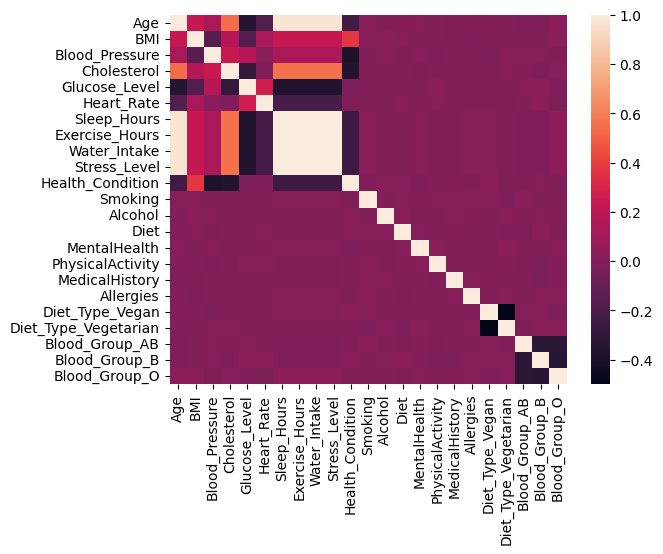

In [18]:
sns.heatmap(data=df.corr())

In [12]:
y = df["Health_Condition"]

In [14]:
df_bkp = df

In [15]:
X = df.drop(columns=["Health_Condition"], axis=1)

In [16]:
X.shape, y.shape

((10000, 22), (10000,))

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 22), (3000, 22), (7000,), (3000,))

Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-1.0333424 , -2.40869154,  1.26400669, ..., -0.57449099,
         1.75072575, -0.58636848],
       [-1.40290654,  1.17926667,  0.32787308, ..., -0.57449099,
         1.75072575, -0.58636848],
       [-0.86909167, -1.38356062, -0.32021942, ..., -0.57449099,
         1.75072575, -0.58636848],
       ...,
       [-0.70484094, -1.38356062, -0.53625025, ...,  1.74067133,
        -0.57119169, -0.58636848],
       [-0.12996339, -0.87099516,  0.93996044, ..., -0.57449099,
        -0.57119169, -0.58636848],
       [ 1.14297976, -0.87099516, -0.14019372, ..., -0.57449099,
         1.75072575, -0.58636848]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
y_train_pred = knn_model.predict(X_train_scaled)

In [31]:
y_pred = knn_model.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [36]:
train_accuracy_report = accuracy_score(y_train, y_train_pred)
test_accuracy_report = accuracy_score(y_test, y_pred)
print(f"Train accuracy score: {train_accuracy_report}")
print(f"Test accuracy score: {test_accuracy_report}")

Train accuracy score: 0.8621428571428571
Test accuracy score: 0.7766666666666666


In [37]:
precision_score(y_train, y_train_pred)

0.8757838160644968

In [38]:
precision_score(y_test, y_pred)

0.7967764540995095

In [39]:
recall_score(y_train, y_train_pred)

0.8423319931074096

In [40]:
recall_score(y_test, y_pred)

0.7495056031641397

In [41]:
confusion_matrix(y_train, y_train_pred)

array([[3102,  416],
       [ 549, 2933]], dtype=int64)

In [42]:
confusion_matrix(y_test, y_pred)

array([[1193,  290],
       [ 380, 1137]], dtype=int64)

Finding the best value of K

In [43]:
training_scores = []
test_scores = []

for k in range(1,51):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_scaled, y_train)
  y_train_loop = knn_model.predict(X_train_scaled)
  training_scores.append(accuracy_score(y_train, y_train_loop))

  y_pred_loop = knn_model.predict(X_test_scaled)
  test_scores.append(accuracy_score(y_test,y_pred_loop))

In [45]:
type(training_scores)

list

In [46]:
train_acc_score_df = pd.DataFrame(
  {
    "K_values": np.arange(1,51),
    "acc_scores" : training_scores
  }
)

In [47]:
train_acc_score_df

,K_values,acc_scores
0,1,1.000000
1,2,0.853429
2,3,0.880857
3,4,0.839000
4,5,0.862143
5,6,0.840571
6,7,0.855143
7,8,0.841429
8,9,0.852143
9,10,0.838429


In [48]:
test_acc_score_df = pd.DataFrame(
  {
    "K_values": np.arange(1,51),
    "acc_scores" : test_scores
  }
)

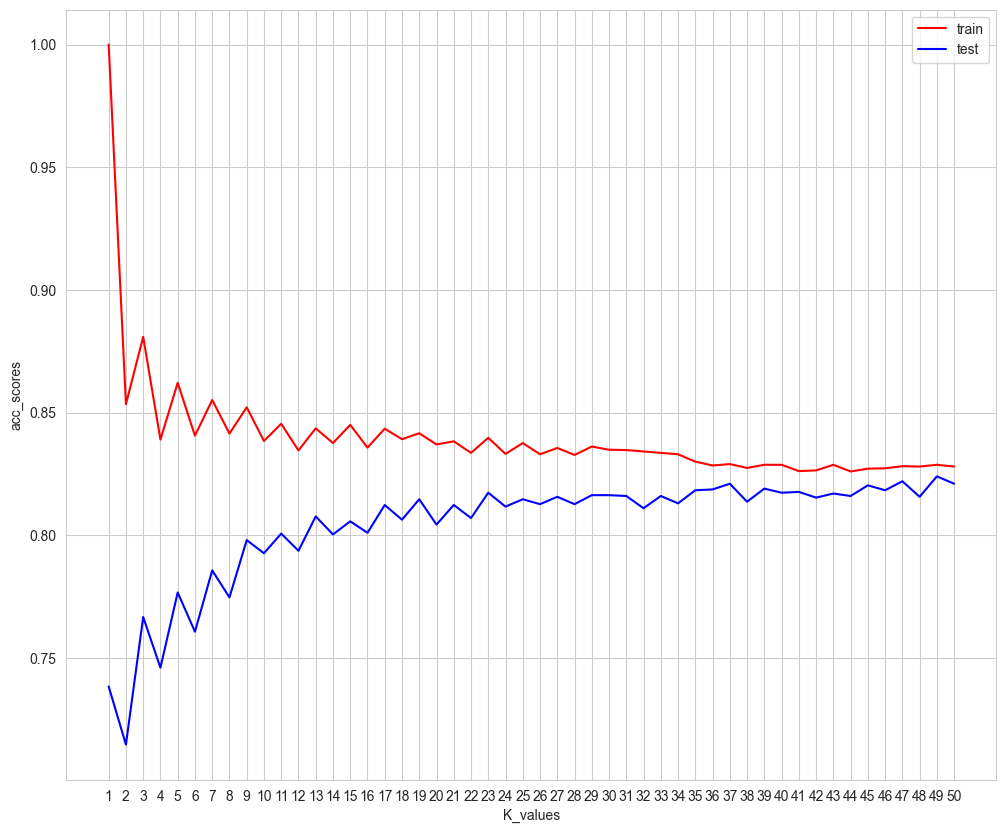

In [50]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.lineplot(x=train_acc_score_df["K_values"], y=train_acc_score_df["acc_scores"], color="red", label="train")
sns.lineplot(x=test_acc_score_df["K_values"], y=test_acc_score_df["acc_scores"], color="blue", label="test")
plt.xticks(np.arange(1,51))
plt.legend()

In [52]:
test_acc_score_df

,K_values,acc_scores
0,1,0.738333
1,2,0.714667
2,3,0.766667
3,4,0.746000
4,5,0.776667
5,6,0.760667
6,7,0.785667
7,8,0.774667
8,9,0.798000
9,10,0.792667


In [53]:
from sklearn.metrics import f1_score, roc_curve, auc

In [54]:
train_f1_score = f1_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_pred)
print(f"Training F1 score : {train_f1_score}")
print(f"Test F1 score: {test_f1_score}")

Training F1 score : 0.8587322500365978
Test F1 score: 0.7724184782608695


In [55]:
f1_score_train = []
f1_score_test = []

for k in range(1,51):
  knn_model_f1 = KNeighborsClassifier(n_neighbors=k)
  knn_model_f1.fit(X_train_scaled, y_train)
  y_train_f1_pred = knn_model_f1.predict(X_train_scaled)
  f1_score_train.append(f1_score(y_train, y_train_f1_pred))

  y_test_f1_pred = knn_model_f1.predict(X_test_scaled)
  f1_score_test.append(f1_score(y_test, y_test_f1_pred))

In [56]:
f1_train_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "f1_scores" : f1_score_train
  }
)

In [57]:
f1_test_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "f1_scores" : f1_score_test
  }
)

Text(0.5, 1.0, 'F1 scores at different values of K')

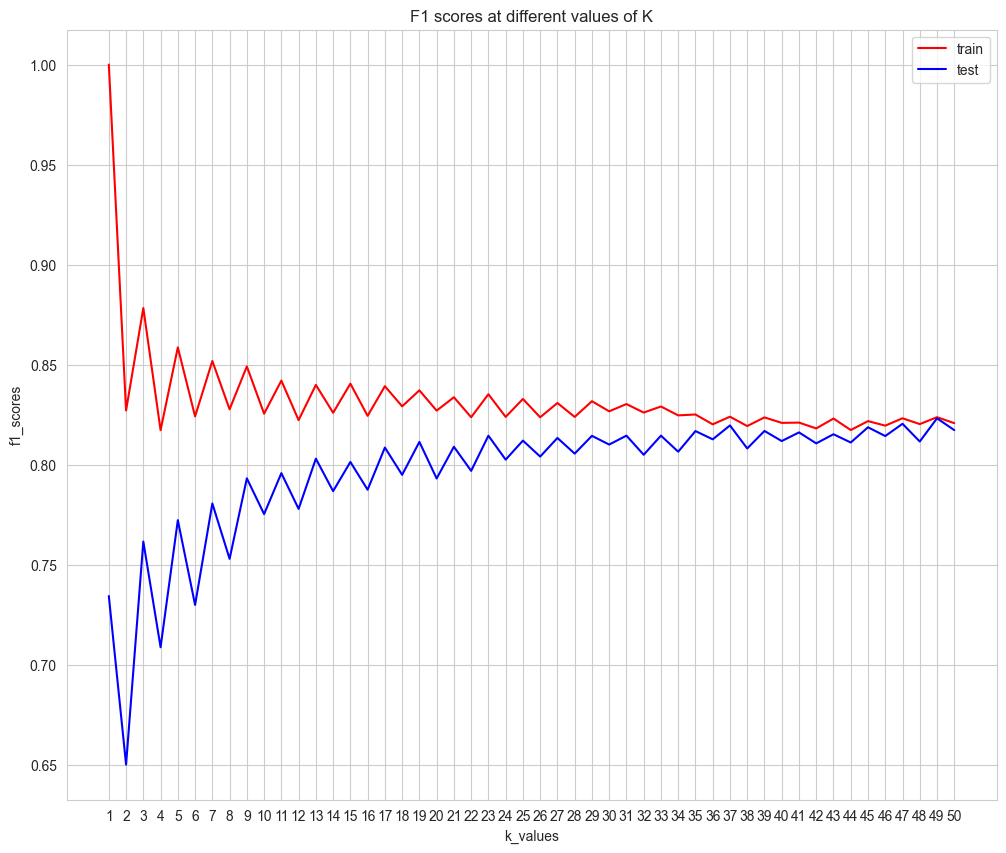

In [58]:
plt.figure(figsize=(12,10), dpi=100)
sns.lineplot(x=f1_train_df["k_values"], y=f1_train_df["f1_scores"], label="train", color="red")
sns.lineplot(x=f1_test_df["k_values"], y=f1_test_df["f1_scores"], label="test", color="blue")
plt.xticks(np.arange(1,51))
plt.legend()
plt.title("F1 scores at different values of K")

From the above graphs of accuracy and F1 scores we can see that K=47 and 49 the gap between train and test dataset is smallest. Hence we will build KNN models for these 2 values and compare their ROC curves

KNN model with K = 47

In [59]:
knn_model_47 = KNeighborsClassifier(n_neighbors=47)

In [60]:
knn_model_47.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=47)

In [61]:
y_train_pred_47 = knn_model_47.predict(X_train_scaled)

In [62]:
y_pred_47 = knn_model_47.predict(X_test_scaled)

In [63]:
test_fpr_47, test_tpr_47, test_47_thresholds = roc_curve(y_test, knn_model_47.predict_proba(X_test_scaled)[:,1])

In [65]:
test_47_roc_auc = auc(test_fpr_47, test_tpr_47)
print(test_47_roc_auc)

0.8992172772413879


Text(0, 0.5, 'True positive rate')

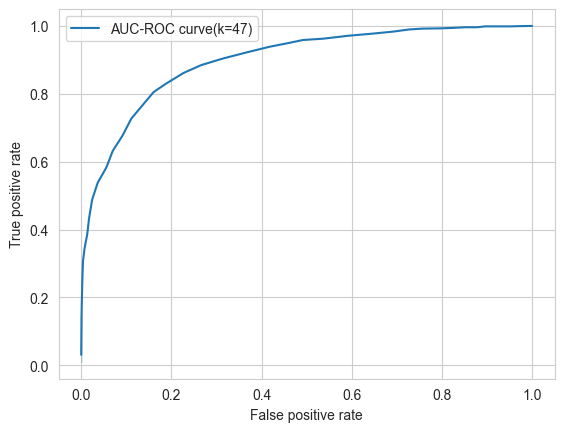

In [66]:
sns.lineplot(x=test_fpr_47, y=test_tpr_47, label="AUC-ROC curve(k=47)")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

KNN Model for k = 49

In [67]:
knn_model_49 = KNeighborsClassifier(n_neighbors=49)

In [68]:
knn_model_49.fit(X_train_scaled, y_train)
y_train_pred_49 = knn_model_49.predict(X_train_scaled)
y_pred_49 = knn_model_49.predict(X_test_scaled)

In [72]:
test_fpr_49, test_tpr_49, test_49_thresholds = roc_curve(y_test, knn_model_49.predict_proba(X_test_scaled)[:,1])

In [73]:
test_49_roc_auc = auc(test_fpr_49, test_tpr_49)
print(test_49_roc_auc)

0.899591103035012


Text(0, 0.5, 'True positive rate')

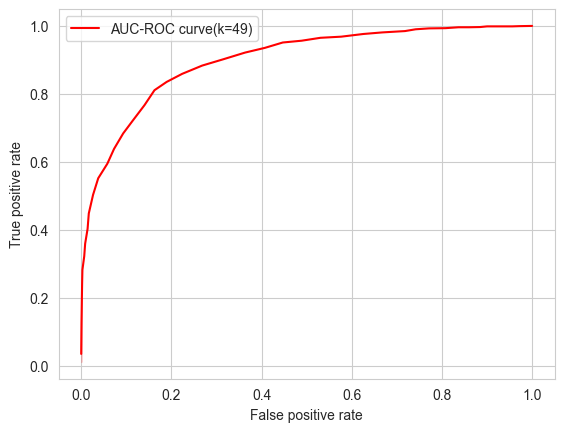

In [74]:
sns.lineplot(x=test_fpr_49, y=test_tpr_49, label="AUC-ROC curve(k=49)", color="red")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

Text(0, 0.5, 'True positive rate')

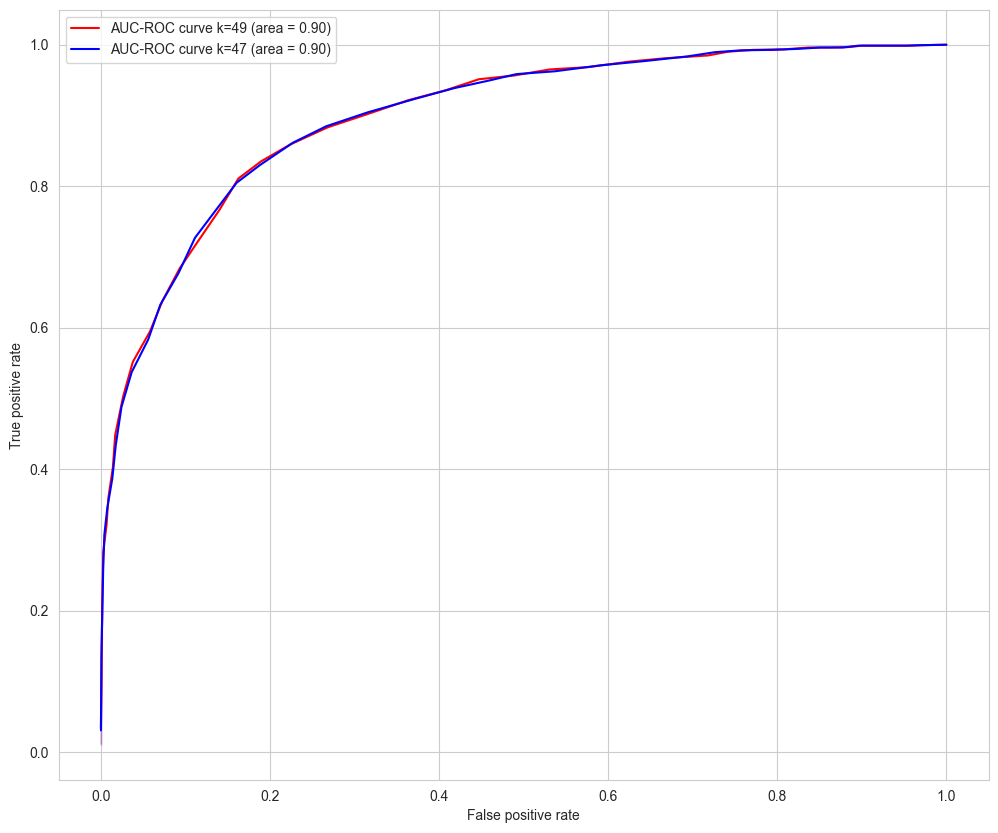

In [75]:
plt.figure(figsize=(12,10), dpi=100)
sns.lineplot(x=test_fpr_49, y=test_tpr_49, label="AUC-ROC curve k=49 (area = %0.2f)" % test_49_roc_auc, color="red")
sns.lineplot(x=test_fpr_47, y=test_tpr_47, label="AUC-ROC curve k=47 (area = %0.2f)" % test_47_roc_auc, color="blue")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

From the above figure we can see the ROC curves and the area is identical

In [78]:
print(classification_report(y_test, y_pred_47))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1483
           1       0.84      0.80      0.82      1517

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



In [79]:
print(classification_report(y_test, y_pred_49))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1483
           1       0.84      0.81      0.82      1517

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



In [81]:
train_test_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "f1_train_scores" : f1_score_train,
    "f1_test_scores" : f1_score_test
  }
)

In [83]:
train_test_df

,k_values,f1_train_scores,f1_test_scores
0,1,1.000000,0.734528
1,2,0.827215,0.650327
2,3,0.878390,0.761743
3,4,0.817372,0.708938
4,5,0.858732,0.772418
5,6,0.824252,0.730075
6,7,0.851928,0.780771
7,8,0.827800,0.753104
8,9,0.849235,0.793315
9,10,0.825598,0.775451


We have looked at F1 scores and ROC curve but since we are classifying persons as "Healthy" and "Unhealthy", we need to ensure that we minimize False negatives because this will unnecessarily increase premiums for healthy persons causing dissatisfaction among customers and impacting future revenue

In [84]:
recall_scores_train = []
recall_scores_test = []

for k in range(1,51):
  knn_model_r = KNeighborsClassifier(n_neighbors=k)
  knn_model_r.fit(X_train_scaled, y_train)
  y_train_r_pred = knn_model_r.predict(X_train_scaled)
  recall_scores_train.append(recall_score(y_train, y_train_r_pred))

  y_test_r_pred = knn_model_r.predict(X_test_scaled)
  recall_scores_test.append(recall_score(y_test, y_test_r_pred))


In [85]:
r_train_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "r_scores" : recall_scores_train
  }
)

In [86]:
r_test_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "r_scores" : recall_scores_test
  }
)

Text(0.5, 1.0, 'Recall scores at different values of K')

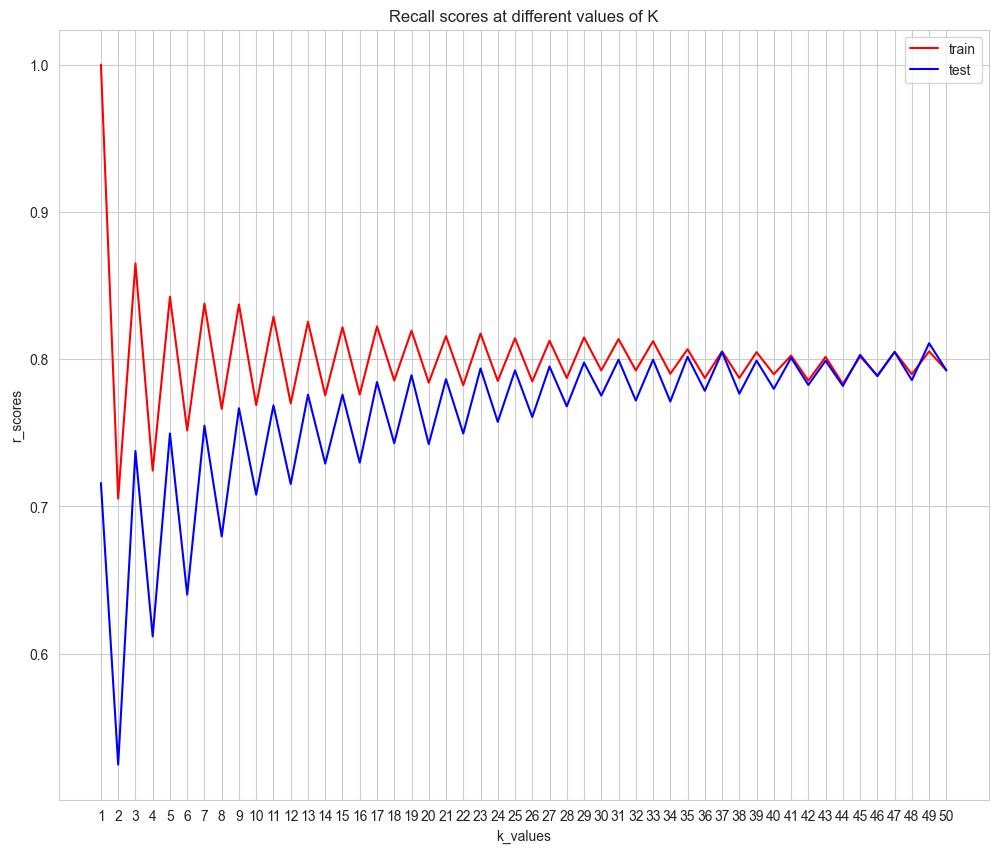

In [87]:
plt.figure(figsize=(12,10), dpi=100)
sns.lineplot(x=r_train_df["k_values"], y=r_train_df["r_scores"], label="train", color="red")
sns.lineplot(x=r_test_df["k_values"], y=r_test_df["r_scores"], label="test", color="blue")
plt.xticks(np.arange(1,51))
plt.legend()
plt.title("Recall scores at different values of K")

In [91]:
train_test_r_df = pd.DataFrame (
  {
    "k_values" : np.arange(1,51),
    "r_train_scores" : recall_scores_train,
    "r_test_scores" : recall_scores_test
  }
)

In [92]:
train_test_r_df[train_test_r_df["r_test_scores"] == train_test_r_df["r_test_scores"].max()]

,k_values,r_train_scores,r_test_scores
48,49,0.805284,0.810811


***From the above analysis, we can conclude that for k=49, we get the optimum values of precision, recall, accuracy, ROC. Hence we can use K=49 for building model based on the given datatset***

In [93]:
X_test

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
937,37.0,20.0,165.0,197.0,103.0,73.0,37.0,37.0,37.0,37.0,...,2,1,2,1,0,False,False,False,False,True
9355,65.0,29.0,78.0,200.0,100.0,75.0,65.0,65.0,65.0,65.0,...,0,0,2,1,2,False,False,False,False,True
2293,37.0,24.0,79.0,195.0,102.0,73.0,37.0,37.0,37.0,37.0,...,1,1,1,2,0,False,True,False,False,True
192,20.0,25.0,109.0,199.0,99.0,75.0,20.0,20.0,20.0,20.0,...,1,0,0,1,0,True,False,False,False,False
8675,37.0,22.0,139.0,196.0,100.0,72.0,37.0,37.0,37.0,37.0,...,0,1,1,2,2,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,86.0,29.0,132.0,200.0,100.0,76.0,86.0,86.0,86.0,86.0,...,1,0,2,1,1,False,False,False,False,False
8978,37.0,25.0,87.0,197.0,98.0,72.0,37.0,37.0,37.0,37.0,...,0,1,2,2,1,False,True,False,False,True
7540,28.0,26.0,82.0,199.0,99.0,73.0,28.0,28.0,28.0,28.0,...,2,2,2,2,1,True,False,True,False,False
5275,37.0,25.0,158.0,198.0,100.0,72.0,37.0,37.0,37.0,37.0,...,2,1,0,2,1,False,False,True,False,False


In [95]:
df_test = X_test

In [96]:
df_test["Predicted_Values"] = y_pred_49

In [97]:
df_test

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O,Predicted_Values
937,37.0,20.0,165.0,197.0,103.0,73.0,37.0,37.0,37.0,37.0,...,1,2,1,0,False,False,False,False,True,0
9355,65.0,29.0,78.0,200.0,100.0,75.0,65.0,65.0,65.0,65.0,...,0,2,1,2,False,False,False,False,True,1
2293,37.0,24.0,79.0,195.0,102.0,73.0,37.0,37.0,37.0,37.0,...,1,1,2,0,False,True,False,False,True,1
192,20.0,25.0,109.0,199.0,99.0,75.0,20.0,20.0,20.0,20.0,...,0,0,1,0,True,False,False,False,False,1
8675,37.0,22.0,139.0,196.0,100.0,72.0,37.0,37.0,37.0,37.0,...,1,1,2,2,False,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,86.0,29.0,132.0,200.0,100.0,76.0,86.0,86.0,86.0,86.0,...,0,2,1,1,False,False,False,False,False,1
8978,37.0,25.0,87.0,197.0,98.0,72.0,37.0,37.0,37.0,37.0,...,1,2,2,1,False,True,False,False,True,1
7540,28.0,26.0,82.0,199.0,99.0,73.0,28.0,28.0,28.0,28.0,...,2,2,2,1,True,False,True,False,False,1
5275,37.0,25.0,158.0,198.0,100.0,72.0,37.0,37.0,37.0,37.0,...,1,0,2,1,False,False,True,False,False,1


In [100]:
y_test

937     0
9355    1
2293    1
192     1
8675    0
       ..
4964    1
8978    1
7540    1
5275    0
9654    0
Name: Health_Condition, Length: 3000, dtype: int64

In [103]:
y_pred_49_series = pd.Series(y_pred_49)
y_pred_49_series

0       0
1       1
2       1
3       1
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    0
Length: 3000, dtype: int64

In [108]:
y_test_new = y_test

In [124]:
new_index = np.arange(0,3000).tolist()

In [125]:
type(new_index)

list

In [126]:
y_test_new = y_test_new.set_axis(new_index)

In [127]:
y_test_new

0       0
1       1
2       1
3       1
4       0
       ..
2995    1
2996    1
2997    1
2998    0
2999    0
Name: Health_Condition, Length: 3000, dtype: int64

In [128]:
df_predicted = pd.DataFrame(
  {
  "actual" : y_test_new,
  "predicted" : y_pred_49_series
  }
)

In [129]:
df_predicted

,actual,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2995,1,1
2996,1,1
2997,1,1
2998,0,1
